# Combine demonstration

In [34]:
# Import the Wastimate module
from Wastimate import *

In [35]:
# Create a radioactive waste package with a mass of 1, containing 1 GBq of Sr-90.
# Sr-90 is in secular equilibrium with its daughter products.
WastePackage   = Package(Mass=1, Inventory={"Sr90":1e9}, mode="activity", secular_equilibrium=["Sr90"])

# Create 1 empty node and 1 node containing 100 packages.
StorageNode    = Node(packagelist=[WastePackage], multiplication_factor=100)
DisposalNode   = Node()

Transfer_Criteria = {"region":"package", "variable":"activity", "principle":"min", 
                     "nuclide":["Sr90"], "criteria":[500e6]}

# Combine all the transferred packages into 1 package
Combine_Instruct = {"package_out":1}

# Create a transfer "order" to move 4 packages per timestep from StorageNode to DisposalNode.
# Combine the moved packages into a single ("package_out" parameter) combined package.
TransferOrder = Order(homenode=DisposalNode, ordernodes=[StorageNode], magnitude=4,
                      mode="Combine", criteria=[Transfer_Criteria], instruct=Combine_Instruct)

# Create a universe that contains the two nodes and the transfer order.
ModelUniverse = Universe(stepsize=1*60*60*24*365) + StorageNode + DisposalNode + TransferOrder

# Simulate 120 timesteps (120 years).
ModelUniverse.simulate(timesteps=120)

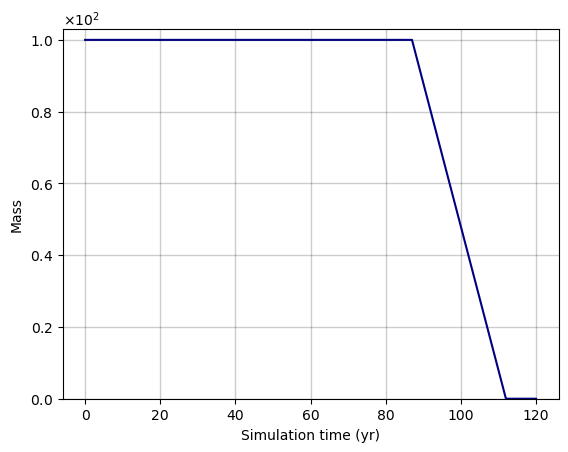

In [36]:
# Plot the mass of StorageNode. No transfers for the first 90 years
# due to the fact that now, the total package activity cannot exceed 500 MBq.
plot1 = ModelUniverse.plot(StorageNode, variable="mass", time_units="yr")

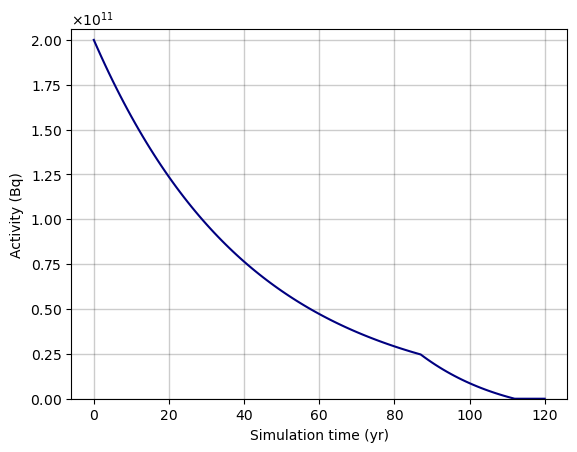

In [38]:
# Plot the activity of DisposalNode.
plot2 = ModelUniverse.plot(StorageNode, variable="activity", time_units="yr")